MLE Homework #2 Travis Johnson 662018371

# Problem 1

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [2]:
X['feature1'] = X['sepal length (cm)'] / X['sepal width (cm)']
X['feature2'] = X['petal length (cm)'] * X['petal width (cm)']

X_new = X[['feature1', 'feature2']]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Problem 2

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

In [7]:
#Only even-numbered digits (0, 2, 4, 6, 8)
even_mask = (y % 2 == 0)
X_even = X[even_mask]
y_even = y[even_mask]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_even, y_even, test_size=0.2, random_state=42)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [10]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1380
           2       0.99      0.98      0.99      1399
           4       0.98      1.00      0.99      1331
           6       0.99      0.99      0.99      1387
           8       0.99      0.98      0.99      1387

    accuracy                           0.99      6884
   macro avg       0.99      0.99      0.99      6884
weighted avg       0.99      0.99      0.99      6884



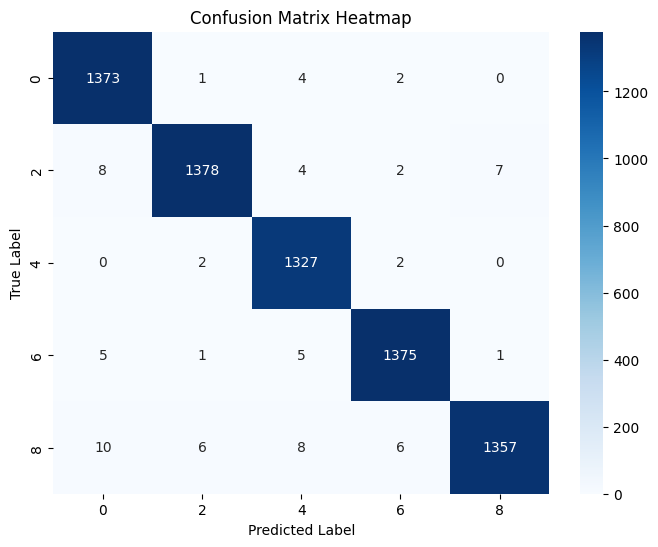

In [11]:
#Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [12]:
#Extracting the number of correctly classified 6's
correct_sixes = conf_matrix[6 // 2, 6 // 2]
print(f"Number of correctly classified 6's: {correct_sixes}")

Number of correctly classified 6's: 1375


# Problem 3

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances_argmin

In [14]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_selected = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

In [17]:
def custom_kmeans(X, n_clusters, n_iterations=100):
    np.random.seed(42)
    centroids = X.sample(n_clusters).to_numpy()

    for _ in range(n_iterations):
        labels = pairwise_distances_argmin(X.to_numpy(), centroids)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [18]:
custom_labels, custom_centroids = custom_kmeans(X_selected, n_clusters=3)

sklearn_kmeans = KMeans(n_clusters=3, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X_selected)

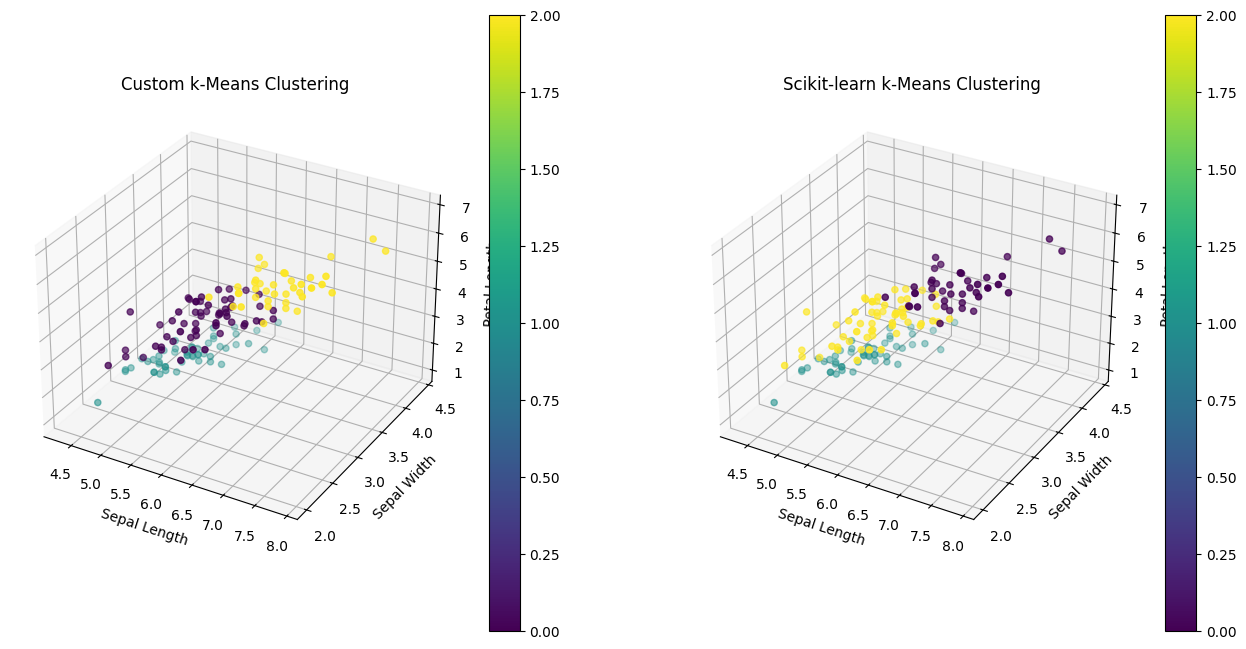

In [19]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], X_selected.iloc[:, 2],
                        c=custom_labels, cmap='viridis')
ax1.set_title("Custom k-Means Clustering")
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax1.set_zlabel("Petal Length")
plt.colorbar(scatter1)

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], X_selected.iloc[:, 2],
                        c=sklearn_labels, cmap='viridis')
ax2.set_title("Scikit-learn k-Means Clustering")
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Sepal Width")
ax2.set_zlabel("Petal Length")
plt.colorbar(scatter2)

plt.show()

In [20]:
custom_inertia = sum(np.min(np.linalg.norm(X_selected.to_numpy() - custom_centroids[label], axis=1)
                            for label, _ in enumerate(custom_centroids)))

sklearn_inertia = sklearn_kmeans.inertia_

print(f"Custom k-means inertia: {custom_inertia}")
print(f"Scikit-learn k-means inertia: {sklearn_inertia}")

Custom k-means inertia: [ 7.96149678  8.30721463  8.63549988  8.45165613  8.11046984  7.94721388
  8.57723987  7.72415225  9.08023022  8.03299978  8.03502237  7.89174154
  8.41544769  9.80256711  9.14273726  9.07167874  8.66200535  7.96149678
  7.9302165   8.15298761  7.52357897  8.01082863  9.58335218  7.49759645
  7.59102416  7.86815671  7.63314866  7.79149987  7.94312075  8.08359163
  7.99105873  7.83920329  8.57891052  8.89914856  8.03299978  8.53851758
  8.33622809  8.20751252  9.21414572  7.71568881  8.25452857  9.68919012
  9.14435203  7.68007553  7.6292418   8.41544769  7.99349926  8.59180678
  8.00729293  7.97880648  6.08371675  5.34532862  5.94273696  5.80941194
  5.38208716  5.07348464  5.42372365  6.75961942  5.47327055  5.84245328
  6.99364356  5.00256289  5.7490404   5.14040362  5.56735133  5.61544349
  5.24771236  5.08645703  5.7461454   5.53655859  5.39749717  5.1565035
  5.626526    5.14773348  5.24086779  5.46534436  5.79819269  5.72691629
  4.95411999  5.73625441  5.

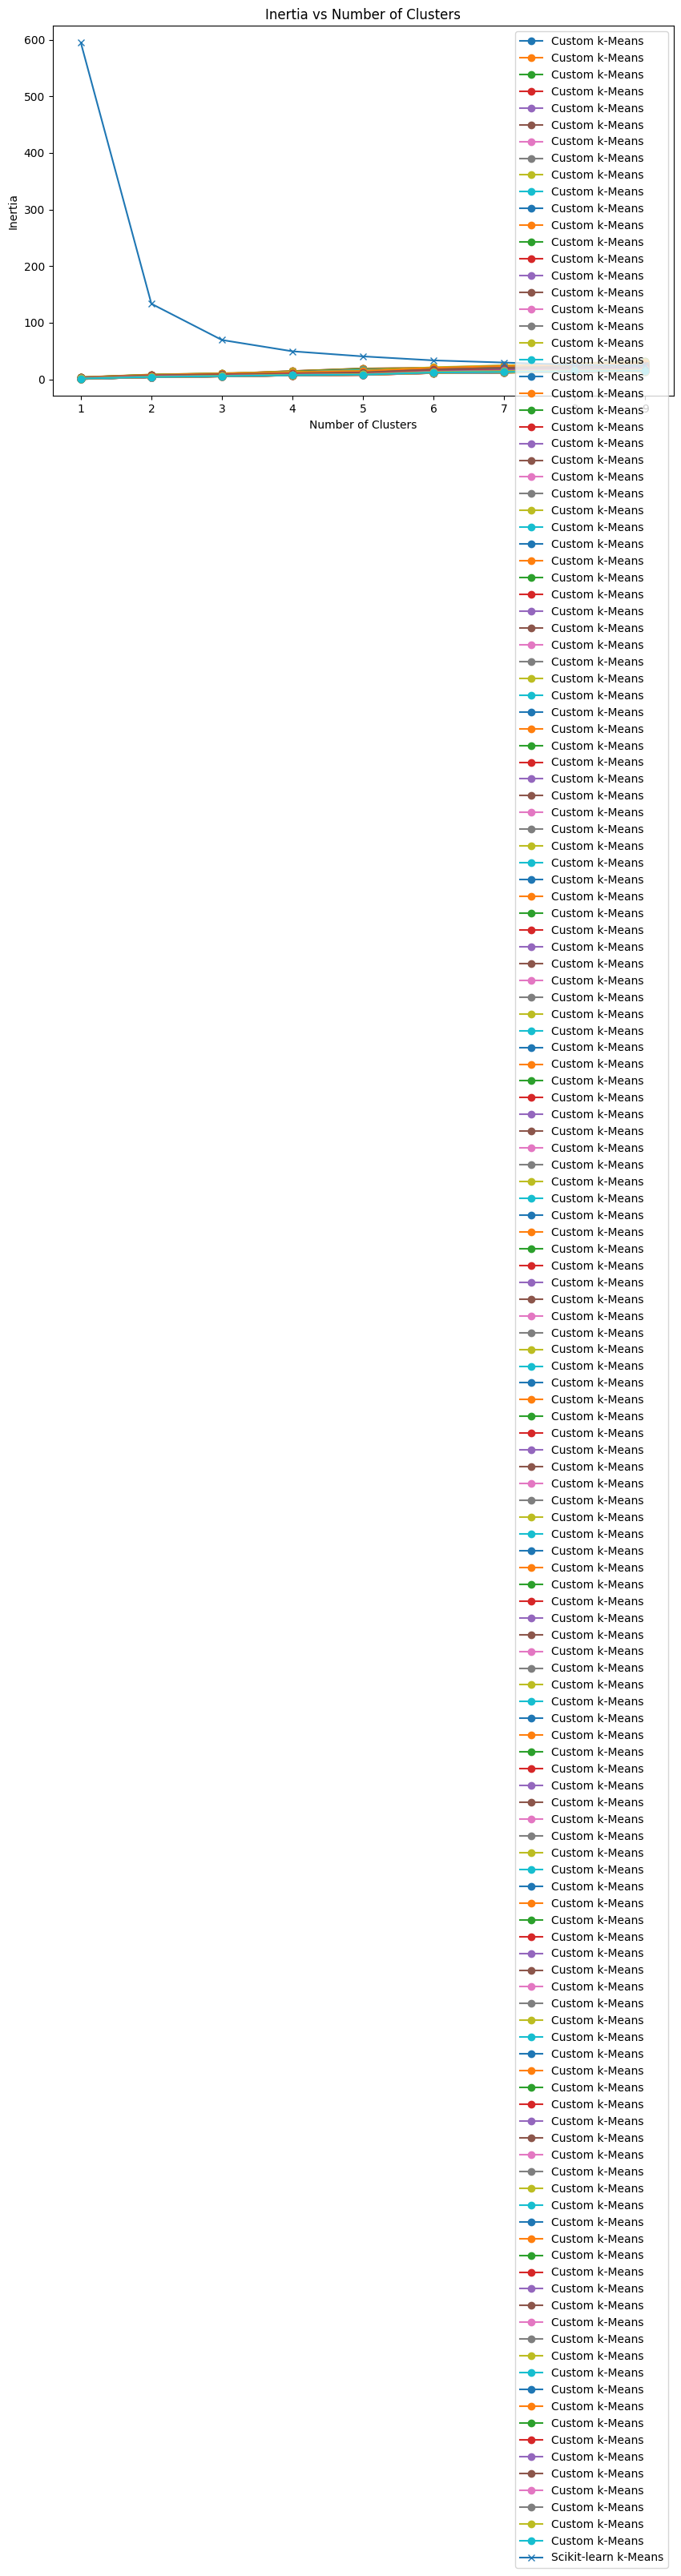

In [21]:
inertias_custom = []
inertias_sklearn = []
cluster_range = range(1, 10)

for n_clusters in cluster_range:
    labels, centroids = custom_kmeans(X_selected, n_clusters)
    inertia = sum(np.min(np.linalg.norm(X_selected.to_numpy() - centroids[label], axis=1)
                         for label, _ in enumerate(centroids)))
    inertias_custom.append(inertia)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_selected)
    inertias_sklearn.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias_custom, label="Custom k-Means", marker='o')
plt.plot(cluster_range, inertias_sklearn, label="Scikit-learn k-Means", marker='x')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.legend()
plt.show()